In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

In [3]:
from src.patch_loader import OpenslidePatchLoader
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset_dir = '../data/tma_dataset/images/'

filepaths = glob(dataset_dir + "/*")
filepaths

['../data/tma_dataset/images/0.tif',
 '../data/tma_dataset/images/1.tif',
 '../data/tma_dataset/images/2.tif']

In [5]:
opl = OpenslidePatchLoader(
    filepath='../data/tma_dataset/images/2.tif',
    patch_size=14,
    channel_is_first_axis=False,
)

print(opl)
print(f"Maximum row is {opl.max_rows}")
print(f"Maximum col is {opl.max_cols}")
print(f"Number of patches is {opl.no_patches()}")

OpenslidePatchLoader('../data/tma_dataset/images/2.tif', [14x14])
Maximum row is 7
Maximum col is 7
Number of patches is 49


(14, 14, 3)
(14, 14, 3)
(14, 14, 3)
(14, 14, 3)


Text(0.5, 0.98, '2.tif')

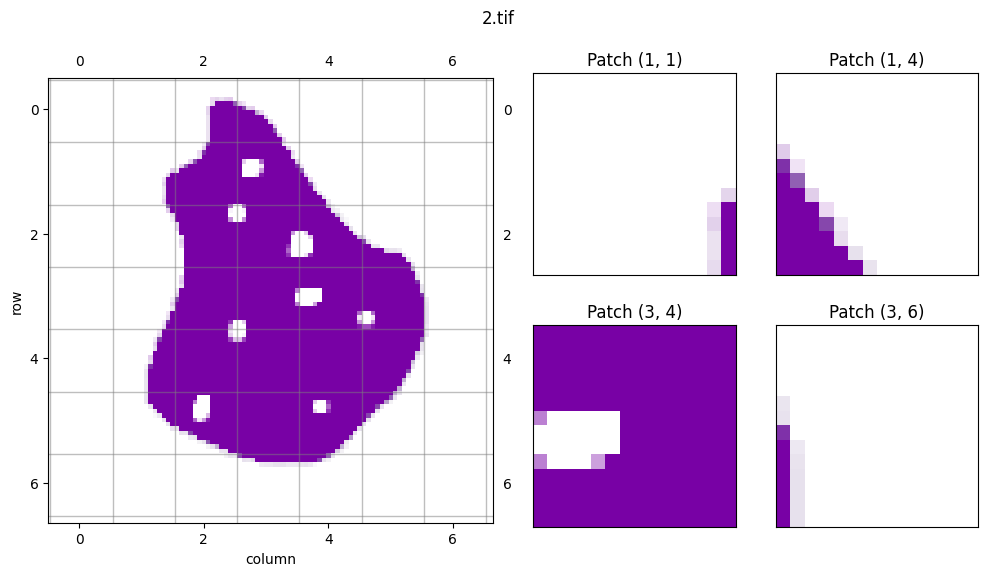

In [6]:
fig, axs = plt.subplot_mosaic(
    # create a 2x2 on the left and four small ones right of it
    figsize=(12,6),
    mosaic=[['A', 'A', 'B', 'C'], ['A', 'A', 'D', 'E']],
)
    
opl.plot_patch_overview(
    tn_downsample_rate=1,
    ax=axs['A']
)

patch_axs = [axs['B'], axs['C'], axs['D'], axs['E']]

    
patch_coords = pd.DataFrame([[1, 1], [1, 4], [3,4], [3,6]], columns=['row', 'col'])

for i, (idx, coord) in enumerate(patch_coords.iterrows()):
    patch = opl.get_patch(coord['row'], coord['col'])
    # this is how the patch is extracted
    print(patch.shape)

    # alternatively, it can be plotted directly
    opl.plot_patch(coord['row'], coord['col'], ax=patch_axs[i])

fig.suptitle(opl.filename)


<Axes: title={'center': 'Patch (1, 3)'}>

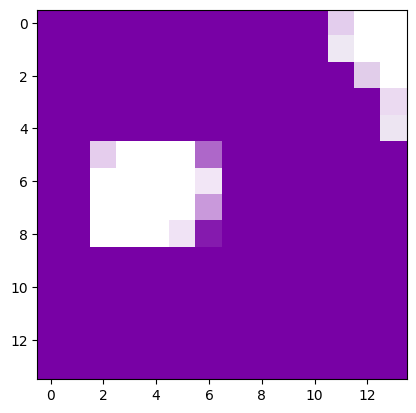

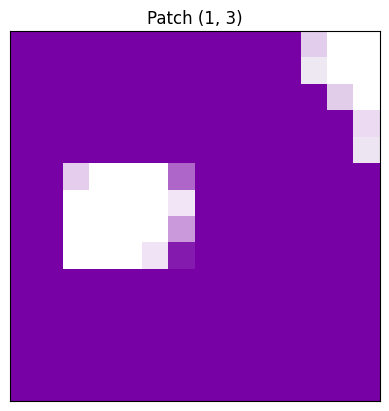

In [7]:
# It is also possible to extract all patches of the slide
all_patches = opl.get_all_patches()

plt.imshow(all_patches[10])

# this should be patch (1,3):
plt.figure()
opl.plot_patch(1, 3)

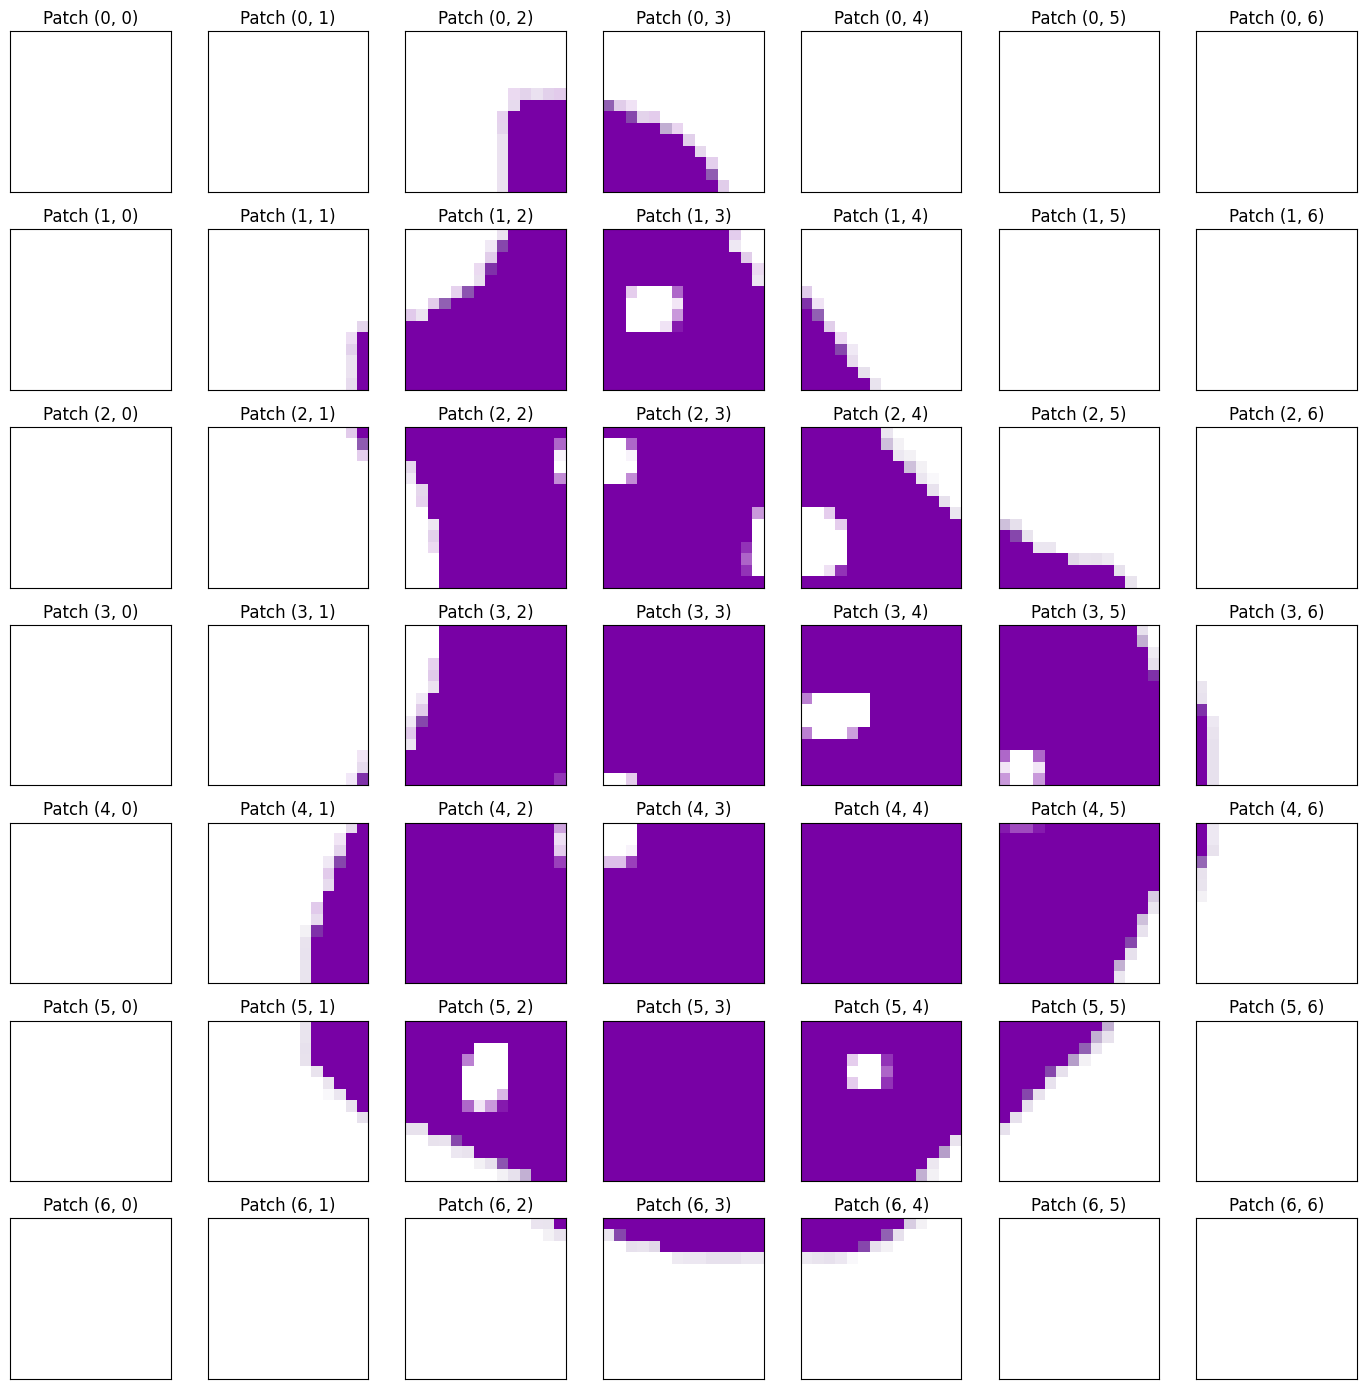

In [8]:
# show a grid of all patches:
ncols = opl.max_cols
nrows = opl.max_rows

fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2))

for row in range(nrows):
    for col in range(ncols):
        opl.plot_patch(row, col, ax=axs[row, col])

plt.tight_layout()